In [35]:
from datetime import date
from os.path import isfile
import time

import warnings
warnings.filterwarnings(action='once')


from fidelity import *
from povm import *
%matplotlib inline



path = 'ghz_6'

Nq = 6
Ns = 200000

Nl, dmodel, Nh = 2, 64, 4
Nep = 400

povm = POVM('pauli6')
Na = povm.Na


model_filetag = '{}/{}_{}_{}-{}-{}-{}'.format(path, Nq, Ns, Nep, Nl, dmodel, Nh)

In [36]:
if isfile('{}_loss.npy'.format(model_filetag)):
    loss = np.load('{}_loss.npy'.format(model_filetag))

    plt.plot(loss[0], label='training')
    plt.plot(loss[1], label='testing')

    plt.legend()

/home/peter/anaconda3/envs/pytorch/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


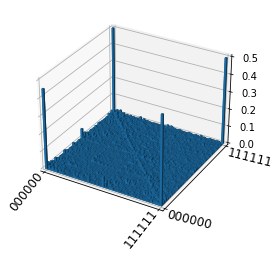

In [39]:


dm_model = np.load('{}_dm.npy'.format(model_filetag))

fig_model, ax_model = plotDM(dm_model, Nq)
# ax_model.set_title('$N_l=%i, d_{emb}=%i$'%(Nl, dmodel))


plt.show(fig_model)

# fig_model.savefig('figures/{}_{}_{}-{}-{}-{}_dm.pdf'.format(path, Nq, Ns, Nep, Nl, dmodel, Nh), dpi=300,bbox_inches="tight")

# Quantum fidelity

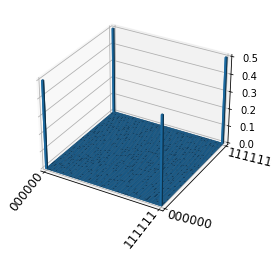

In [4]:
dm_state = np.load('{}/{}_dm.npy'.format(path, Nq))
fig_state = plotDM(dm_state, Nq)
plt.show(fig_state)

In [5]:
from qiskit.quantum_info import state_fidelity

print(state_fidelity(dm_state, dm_model, validate=False))
print(np.trace(np.matmul(dm_state, dm_model)).real)

0.5777302885203687
0.5774259357930542


In [6]:
# Comparison with IBMQ

if path == 'ghz_3_ibmq':
    dm_ibmq = np.load('{}/{}_{}_dm-ibmq.npy'.format(path, Nq, Ns))

    print(state_fidelity(dm_state, dm_ibmq))
    print(state_fidelity(dm_ibmq, dm_model, validate=False))

/home/peter/anaconda3/envs/pytorch/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
